In [ ]:
__doc__ = """
Top Rated Movie Data Analysis

This script fetches the top-rated movies from The Movie Database (TMDb) API, processes the data using pandas,  
and visualizes trends in ratings using Matplotlib and Seaborn.

Features:
- Retrieves movie data via API requests.
- Cleans and structures the data into a pandas DataFrame.
- Analyzes trends in movie ratings.
- Visualizes findings using histograms, line charts.

Requirements:
- pandas, requests, matplotlib, seaborn, numpy
- A valid TMDb API key or API Read Access Token.
"""


In [75]:
import pandas as pd
import json
import requests

In [ ]:
url = "https://api.themoviedb.org/3/movie/top_rated?language=en-US&page=1"

headers = {
    "accept": "application/json",
    "Authorization": "Bearer {put API Read Access Token here}"
}

response = requests.get(url, headers=headers)

pages = response.json()['total_pages']

In [77]:
data = response.json()
with open('Movie_data_example_json.json','w') as file:
    json.dump(data,file,indent=4)

In [ ]:
Movie_Data = pd.DataFrame()

for i in range(1,pages-3):
    
    url = "https://api.themoviedb.org/3/movie/top_rated?language=en-US&page={}".format(i)

    headers = {
        "accept": "application/json",
        "Authorization": "Bearer {put API Read Access Token here}"
    }

    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Error on page {i}: Status Code {response.status_code}")
        print("Response:", response.text)  
        continue

    data = response.json()

    if 'results' not in data:
        print(f"Unexpected response on page {i}: {data}")  
        continue

    
    df = pd.DataFrame(data['results']).drop(columns=['backdrop_path','poster_path','video'])

    Movie_Data = pd.concat([Movie_Data,df], ignore_index=True)  

In [79]:
Movie_Data

,adult,genre_ids,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,False,"[18, 80]",278,en,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,6.810,1994-09-23,The Shawshank Redemption,8.700,27881
1,False,"[18, 80]",238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",5.445,1972-03-14,The Godfather,8.700,21146
2,False,"[18, 80]",240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,4.983,1974-12-20,The Godfather Part II,8.570,12767
3,False,"[18, 36, 10752]",424,en,Schindler's List,The true story of how businessman Oskar Schind...,4.712,1993-12-15,Schindler's List,8.567,16218
4,False,"[28, 12, 53]",1356039,es,Contraataque,When a hostage rescue mission creates a new en...,9.495,2025-02-27,Counterattack,8.567,418
...,...,...,...,...,...,...,...,...,...,...,...
9955,False,"[28, 12, 35, 14, 878]",2436,en,Double Dragon,Two brothers have half of a powerful ancient C...,3.530,1994-11-04,Double Dragon,4.400,344
9956,False,"[10749, 18]",472838,en,SPF-18,18-year-old Penny Cooper spent years pining fo...,3.537,2017-09-29,SPF-18,4.400,1048
9957,False,"[27, 53]",10726,en,American Psycho II: All American Girl,Rachel is a criminology student hoping to land...,3.531,2002-06-18,American Psycho II: All American Girl,4.417,416
9958,False,"[28, 12, 878]",166424,en,Fantastic Four,Four young outsiders teleport to a dangerous u...,4.286,2015-08-05,Fantastic Four,4.419,6043


In [80]:
Movie_Data.to_csv('Top_Rated_Movie_Data.csv')

In [81]:
df1 = pd.read_csv('Top_Rated_Movie_Data.csv')

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

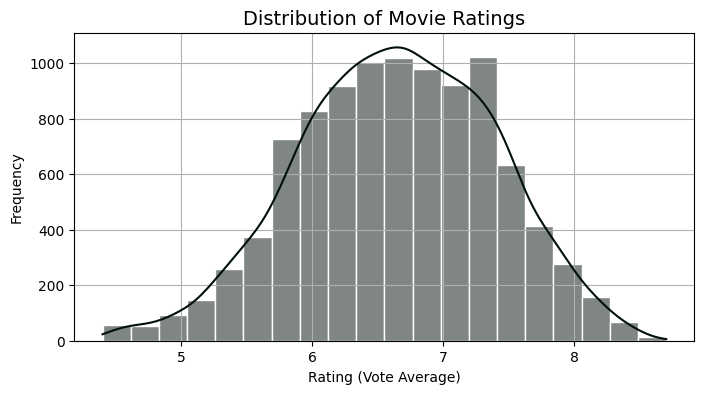

In [83]:
plt.figure(figsize=(8,4))
sns.histplot(df1['vote_average'],bins=20,kde=True,color='#000F08',edgecolor='white')
plt.title("Distribution of Movie Ratings", fontsize=14)
plt.xlabel("Rating (Vote Average)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

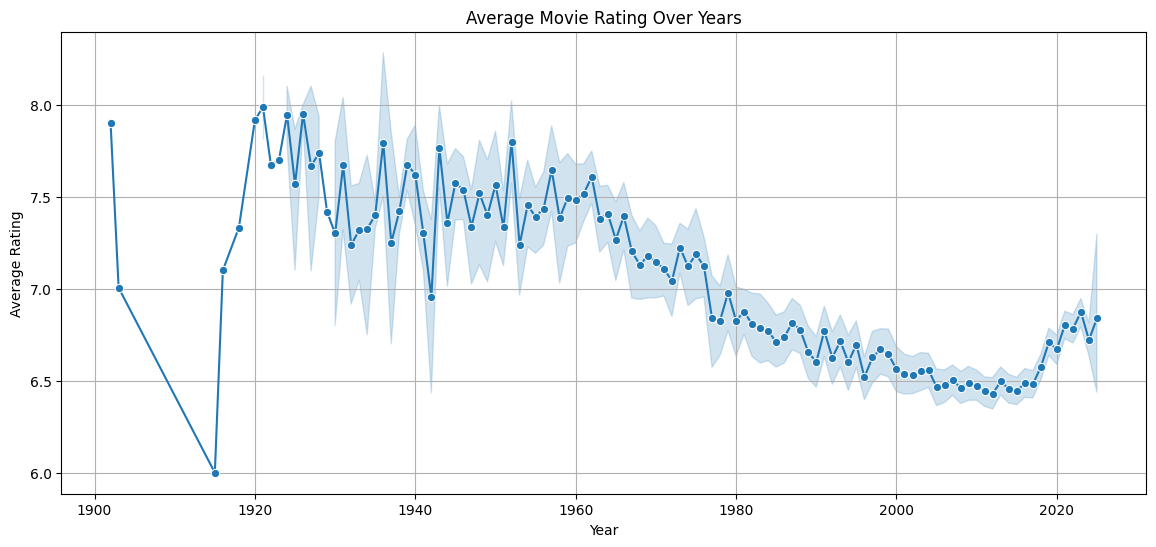

In [91]:
df1['release_year'] = pd.to_datetime(df1['release_date']).dt.year
plt.figure(figsize=(14, 6))
sns.lineplot(x=df1['release_year'], y=df1['vote_average'], marker="o")
plt.title("Average Movie Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.show()